In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from keras.datasets import mnist 

/home/qinritukou/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist 

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

11493376/11490434 [==============================] - 236s 21us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

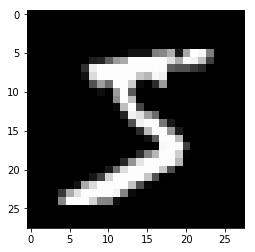

In [6]:
plt.imshow(X_train[0], cmap='gray')

In [7]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [8]:
X_train.shape

(60000, 784)

In [9]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [10]:
from keras.utils.np_utils import to_categorical

In [11]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [12]:
y_train_cat.shape

(60000, 10)

In [13]:
y_train[0]

5

In [14]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

<h1>Fully connected on images</h1>

In [15]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [16]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 62us/step - loss: 0.2838 - acc: 0.9129 - val_loss: 0.2011 - val_acc: 0.9383
Epoch 2/10
54000/54000 [==============================] - 1s 24us/step - loss: 0.1000 - acc: 0.9704 - val_loss: 0.1034 - val_acc: 0.9693
Epoch 3/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.0688 - acc: 0.9794 - val_loss: 0.0670 - val_acc: 0.9792
Epoch 4/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.0506 - acc: 0.9840 - val_loss: 0.0964 - val_acc: 0.9740
Epoch 5/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.0383 - acc: 0.9881 - val_loss: 0.0787 - val_acc: 0.9823
Epoch 6/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.0308 - acc: 0.9907 - val_loss: 0.0916 - val_acc: 0.9797
Epoch 7/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.0252 - acc: 0.9925 - val_loss: 0.1063 - val_acc:

Text(0.5,0,'Epochs')

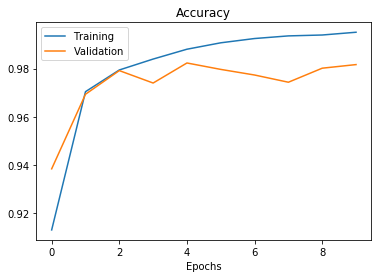

In [17]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')